In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm.notebook import tqdm
from numba import njit
from jax import grad, jit, vmap
import jax.numpy as jnp
import jax
from scipy.optimize import fmin, minimize_scalar, minimize, root_scalar
from scipy.signal import find_peaks

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from integrals import *
from known_formulas import *

### $p=3$

In [59]:
blend = 0.8
p_value = 3
ms = np.linspace(0.001, 0.999, 5_000)

Ts = np.linspace(0.6508, 0.6515, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

(-0.001, 0.001)

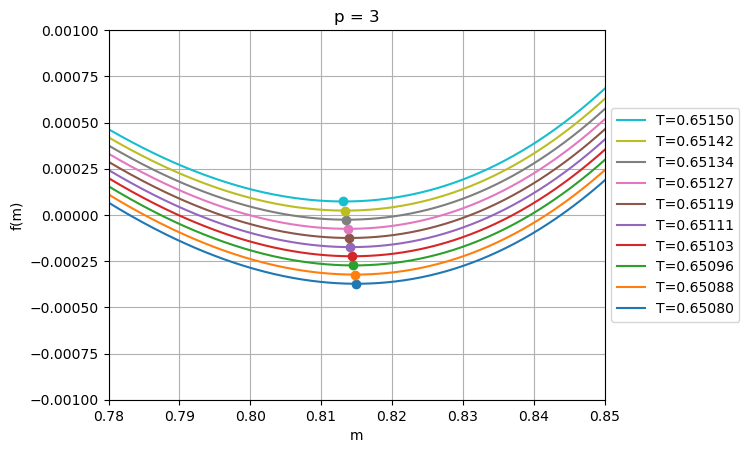

In [61]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.xlim(0.78,0.85)
plt.ylim(-0.001, 0.001)

## $p=4$

In [71]:
blend = 0.8
p_value = 4
ms = np.linspace(0.001, 0.999, 5_000)

Ts = np.linspace(0.6, 0.7, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

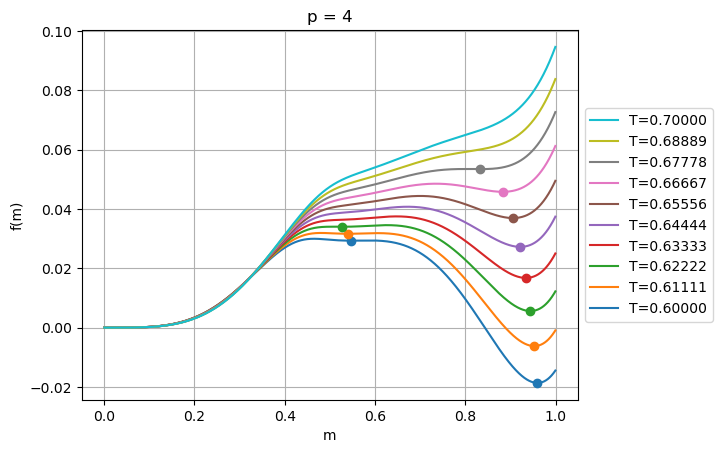

In [72]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

# plt.xlim(0.78,0.85)
# plt.ylim(-0.001, 0.001)

## $p=5$

In [75]:
blend = 0.8
p_value = 5
ms = np.linspace(0.001, 0.999, 5_000)

Ts = np.linspace(0.6, 0.61, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

(-0.01, 0.01)

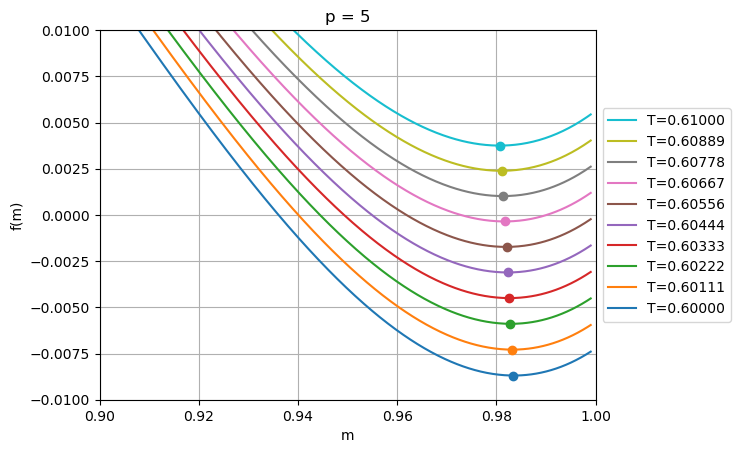

In [78]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.xlim(0.9,1.0)
plt.ylim(-0.01, 0.01)